In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import sweetviz as sv

# Load dataset
df = pd.read_csv("Desktop/PACE-FALL-DATA/Thursday-IntroDS/telco-customer-churn.csv")

# Preview the data
df.head()


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
# 1.1 Check for missing values
print("Missing Values:\n", df.isnull().sum())

# 1.2 Check for NaN and infinite values
print("NaN Values:\n", df.isna().sum())
#print("Infinite Values:\n", np.isinf(df).sum())

# 1.3 Convert non-numeric columns to numeric using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 1.4 Check for outliers using the Interquartile Range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("Outliers in each column:\n", outliers)


Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
NaN Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Outliers in each col

In [4]:
# 2.1 List all column data types
print("Data Types:\n", df.dtypes)

# 2.2 Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric Columns:\n", numeric_cols)
print("Categorical Columns:\n", categorical_cols)


Data Types:
 customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object
Numeric Columns:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')
Categorical Columns:
 Index([], dtype='object')


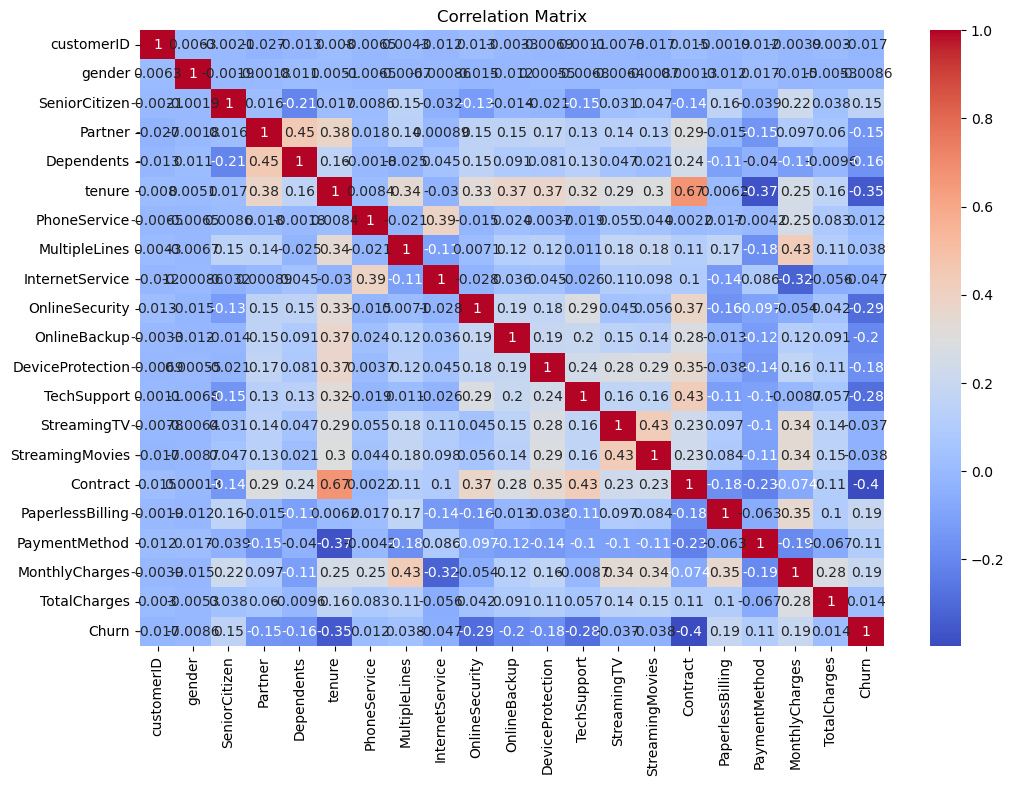

C:\Users\Ghanu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


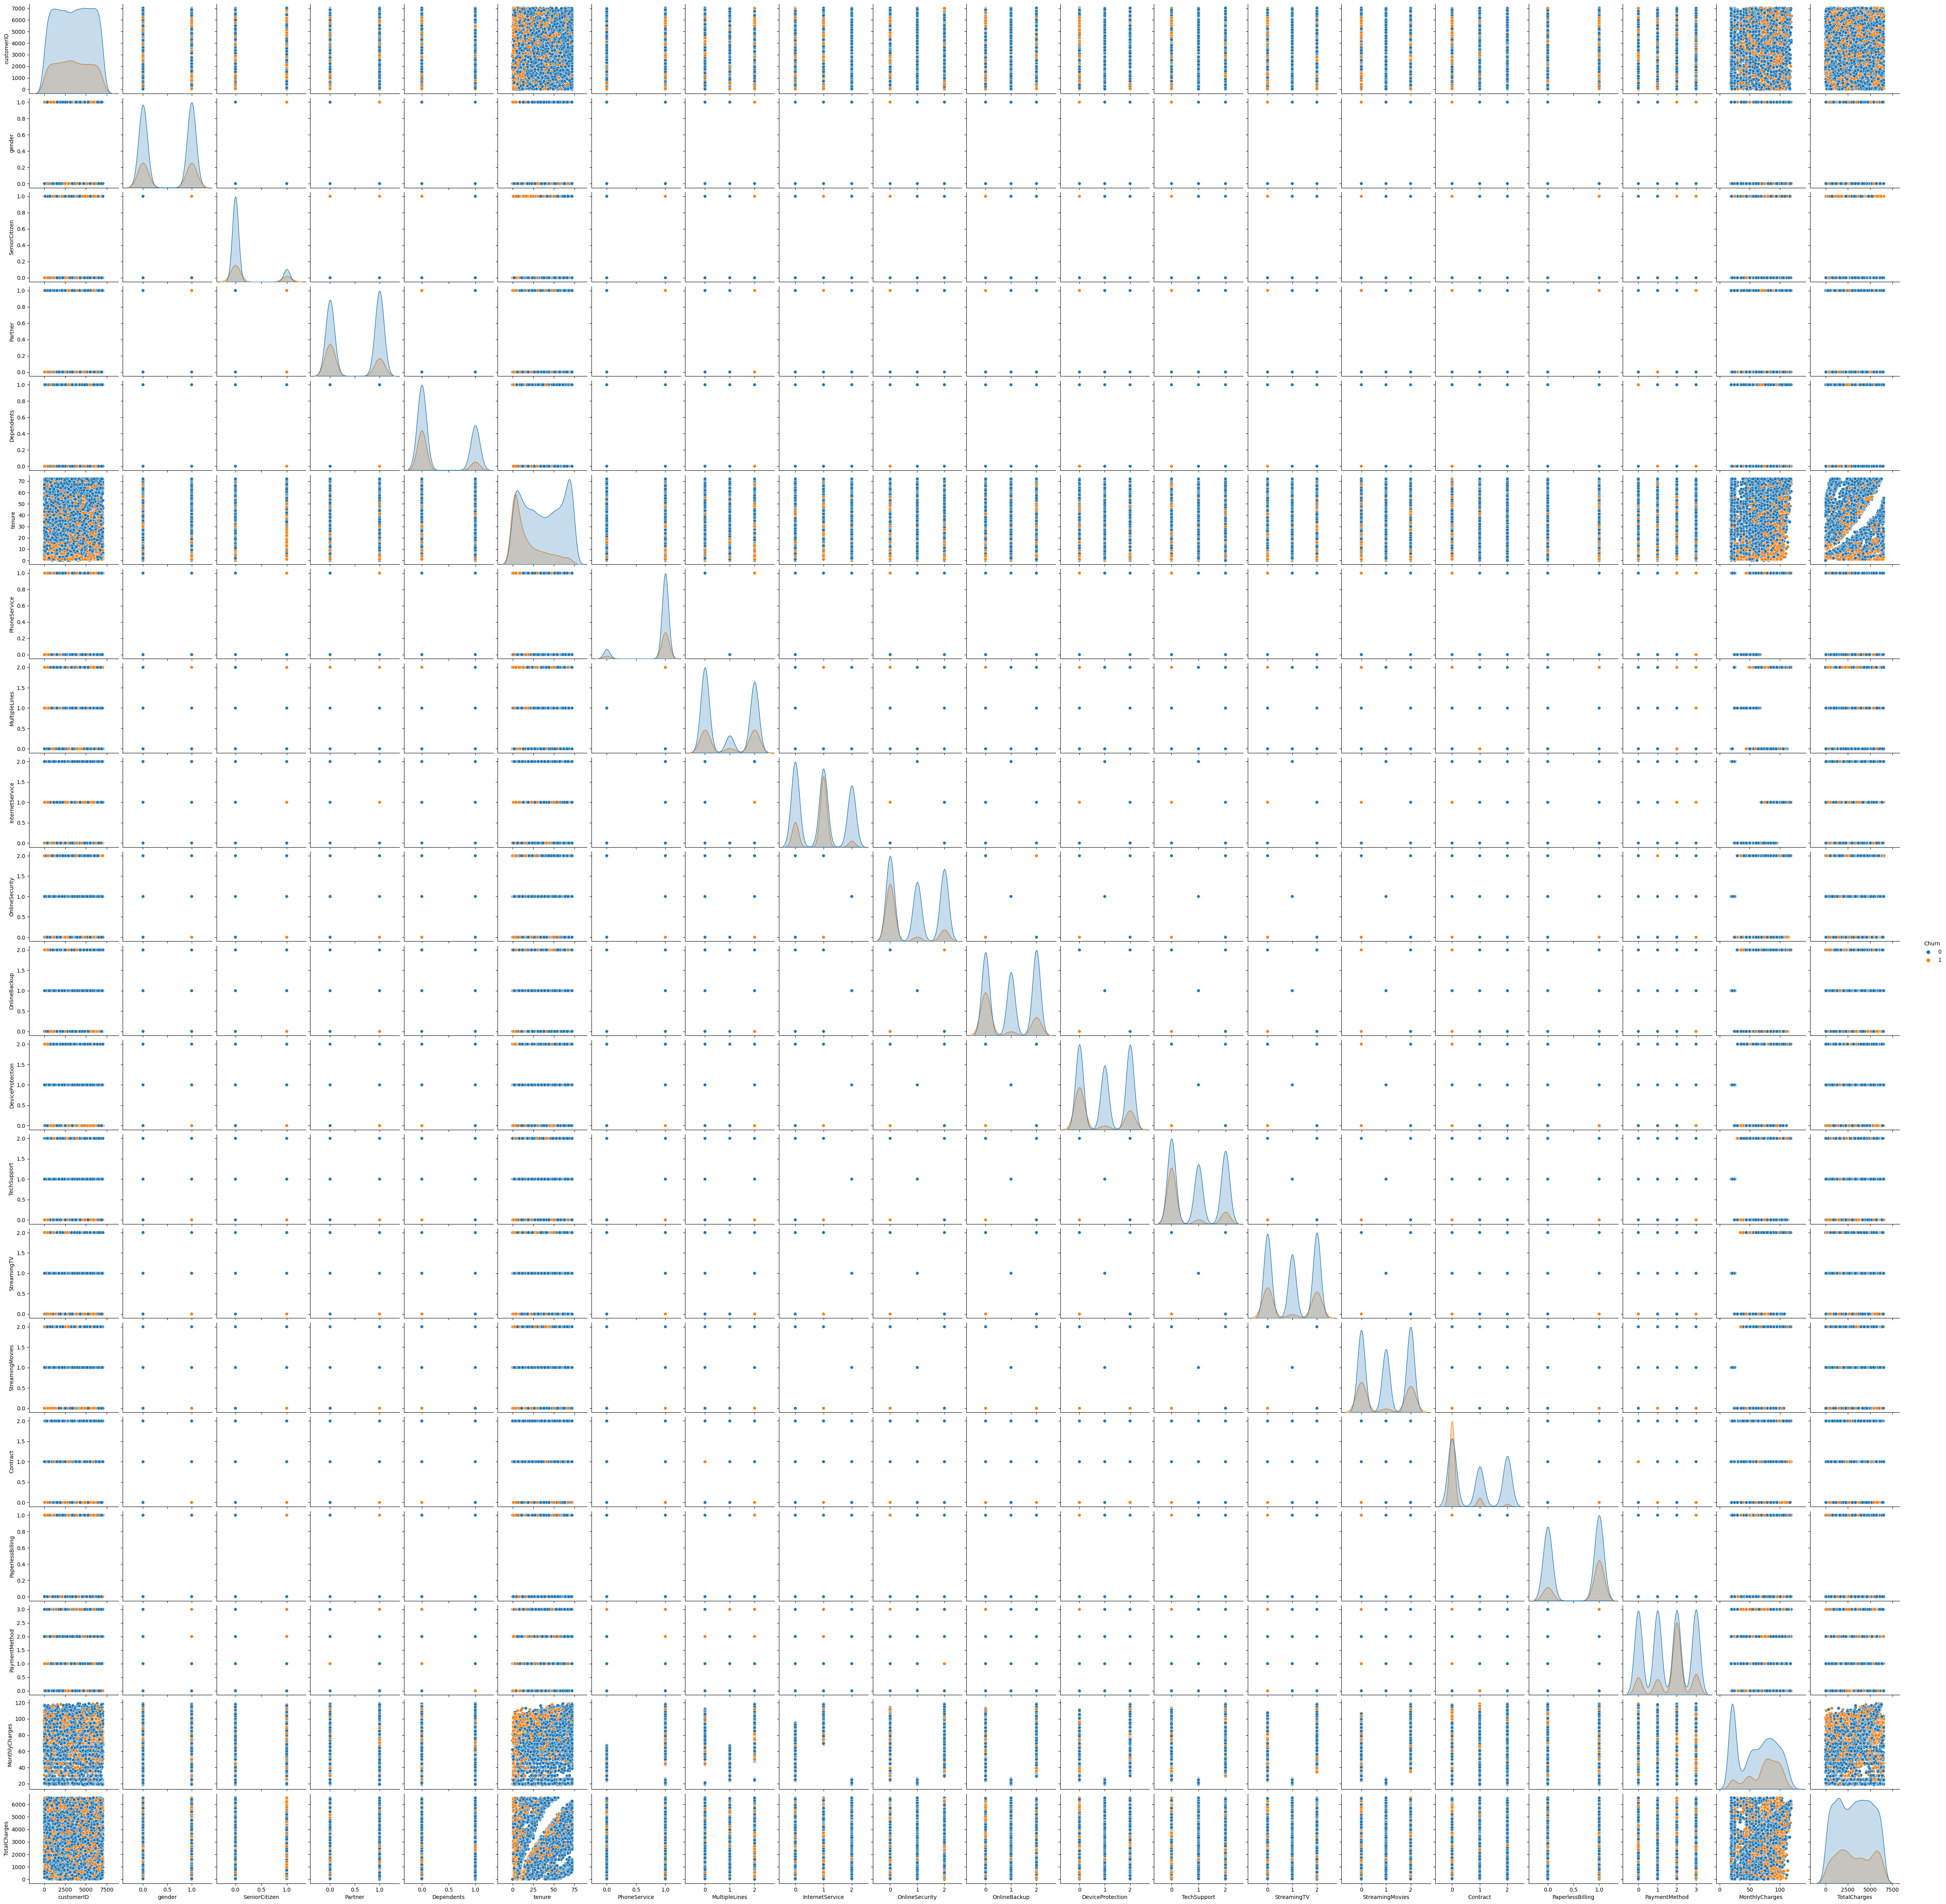

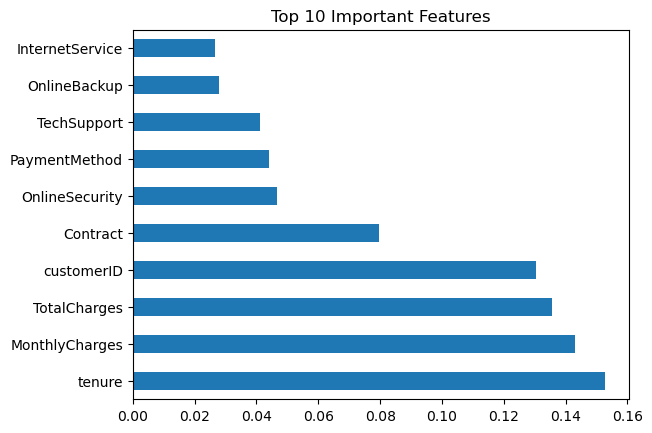

In [5]:
# 3.1 Correlation matrix for numeric features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 3.2 Pairplot for key features against the target (assuming 'Churn' is the target)
sns.pairplot(df, hue='Churn', diag_kind='kde')  # Replace 'Churn' with your target column name
plt.show()

# 3.3 Feature Importance using Random Forest
X = df.drop(columns=['Churn'])  # Replace 'Churn' with your target column name
y = df['Churn']

# Fit a RandomForestClassifier to find feature importance
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()


In [6]:
# 4.1 Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.2 Create Sweetviz comparison report
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

report = sv.compare([train_data, "Training Data"], [test_data, "Test Data"])
report.show_html("sweetviz_comparison_report.html")  # Save report as HTML


                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_comparison_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [7]:
# 5.1 Check class imbalance in the target variable (assuming 'Churn' is the target)
class_counts = df['Churn'].value_counts()
print("Churn Class Distribution:\n", class_counts)

# 5.2 Check skewness of numeric features
numeric_skew = df[numeric_cols].skew()
print("Skewness in Numeric Columns:\n", numeric_skew)

# 5.3 Check for highly correlated features
high_corr = df.corr().abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr > 0.8]
print("Highly Correlated Features (Correlation > 0.8):\n", high_corr)


Churn Class Distribution:
 Churn
0    5174
1    1869
Name: count, dtype: int64
Skewness in Numeric Columns:
 SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64
Highly Correlated Features (Correlation > 0.8):
 customerID        customerID          1.0
DeviceProtection  DeviceProtection    1.0
Partner           Partner             1.0
Dependents        Dependents          1.0
tenure            tenure              1.0
PhoneService      PhoneService        1.0
MultipleLines     MultipleLines       1.0
InternetService   InternetService     1.0
OnlineSecurity    OnlineSecurity      1.0
TechSupport       TechSupport         1.0
gender            gender              1.0
StreamingTV       StreamingTV         1.0
StreamingMovies   StreamingMovies     1.0
Contract          Contract            1.0
PaperlessBilling  PaperlessBilling    1.0
PaymentMethod     PaymentMethod       1.0
MonthlyCharges    MonthlyCharges      1.0
TotalCharges      TotalCharges  

In [8]:
#Conclusion
#Step 1 prepares the data by handling missing values, converting to numeric data, and detecting outliers.
#Step 2 lists all data types in the dataset.
#Step 3 performs EDA by showing the correlation matrix and determining feature importance.
#Step 4 splits the data and uses SweetViz to compare the training and testing sets.
#Step 5 identifies limitations such as class imbalance, skewness, and multicollinearity.#

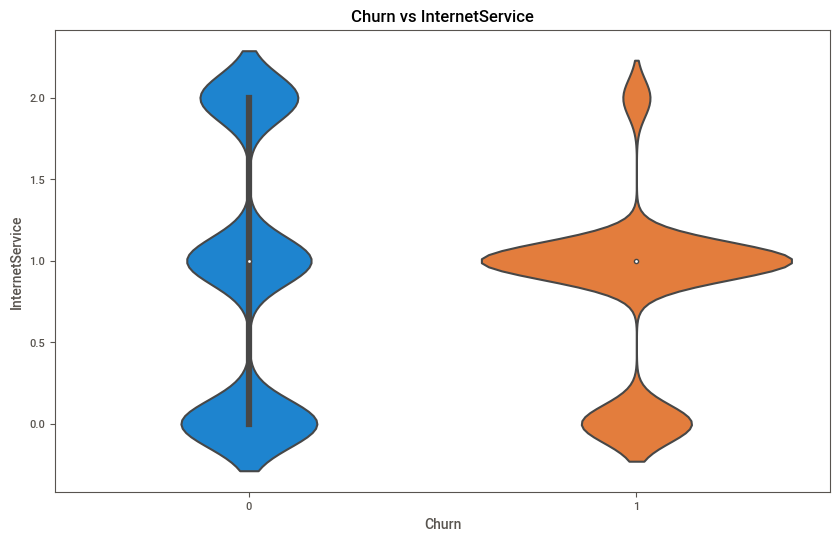

In [9]:
#Additional Visualization for EDA using Violin plots(Individual plots)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='InternetService', data=df)
plt.title('Churn vs InternetService')
plt.show()

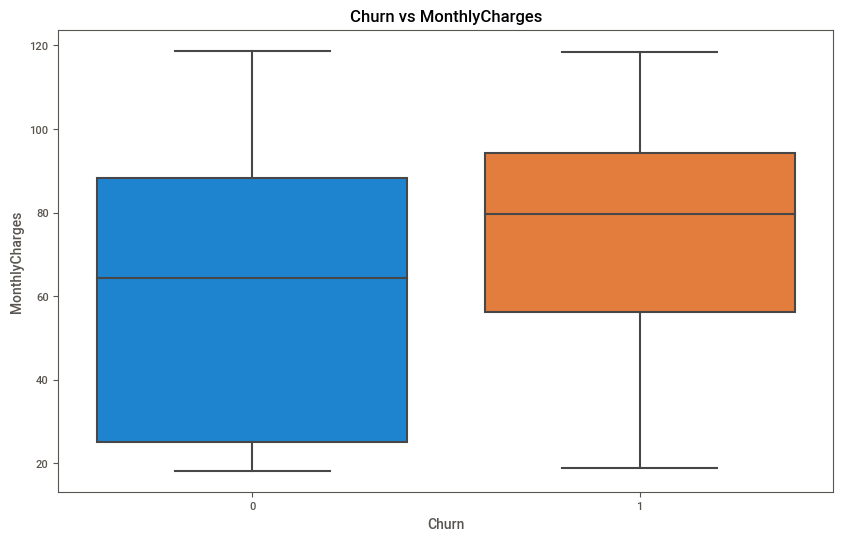

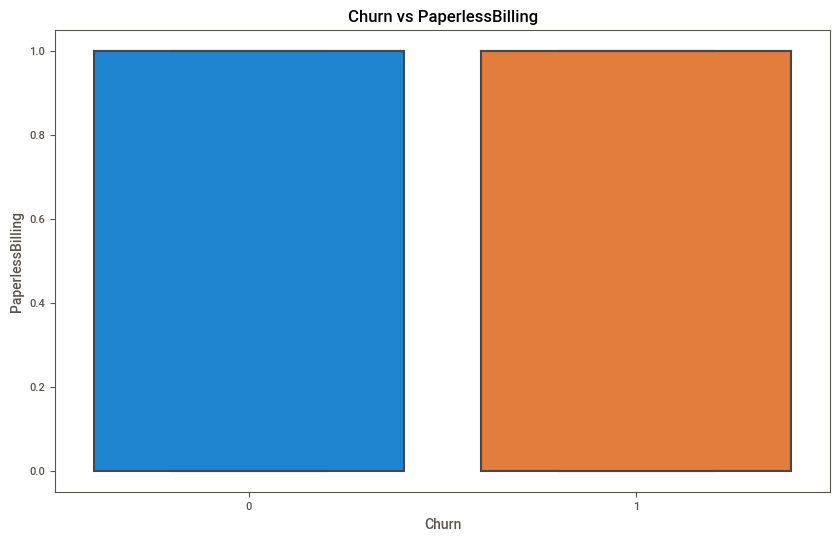

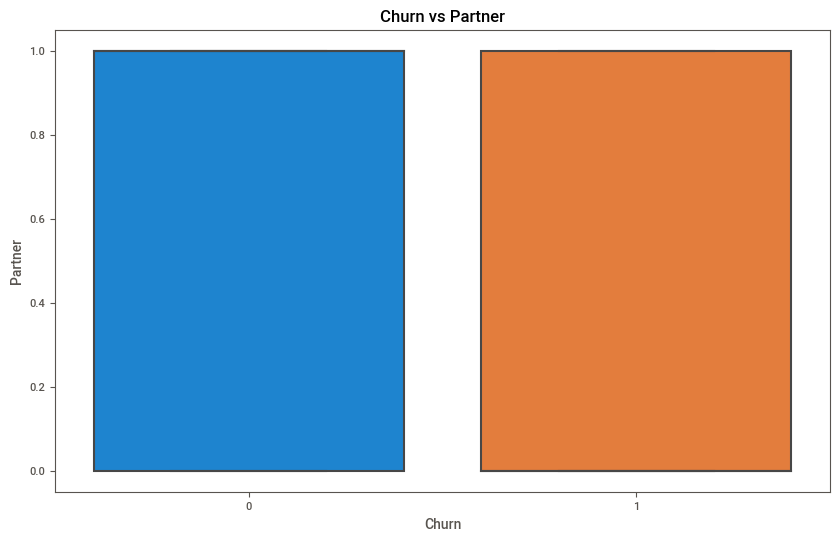

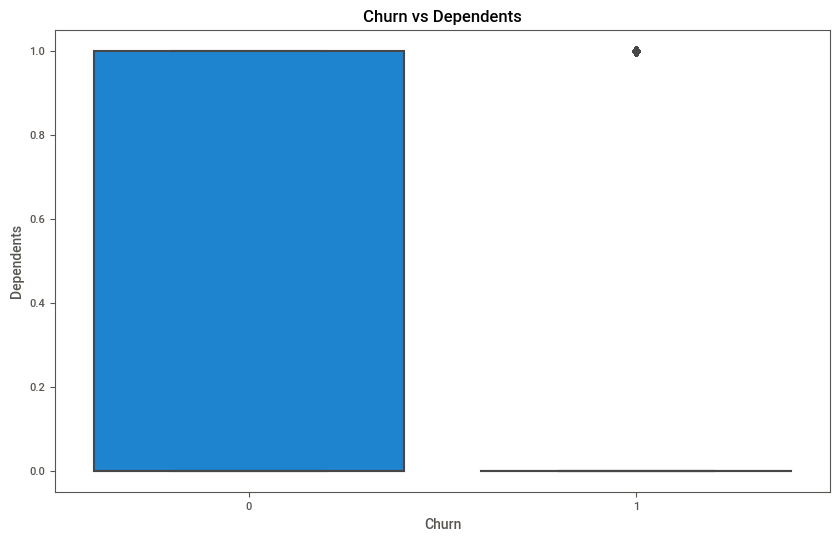

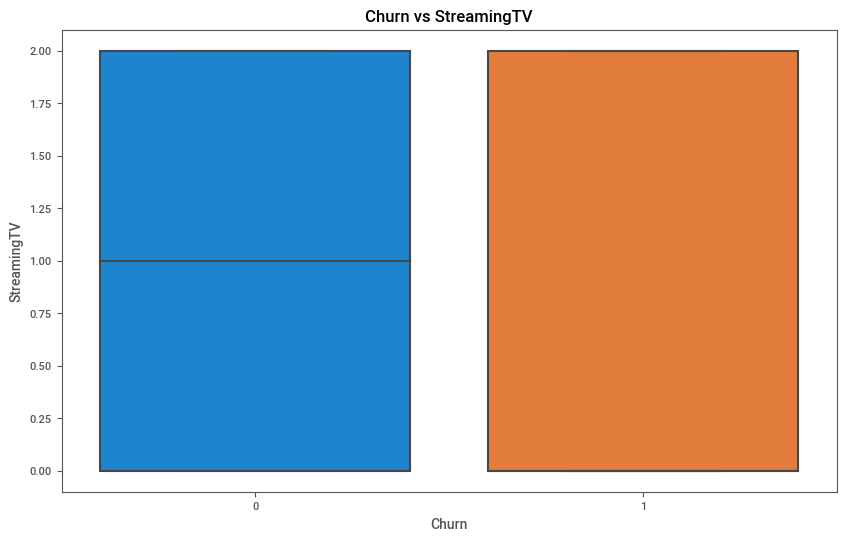

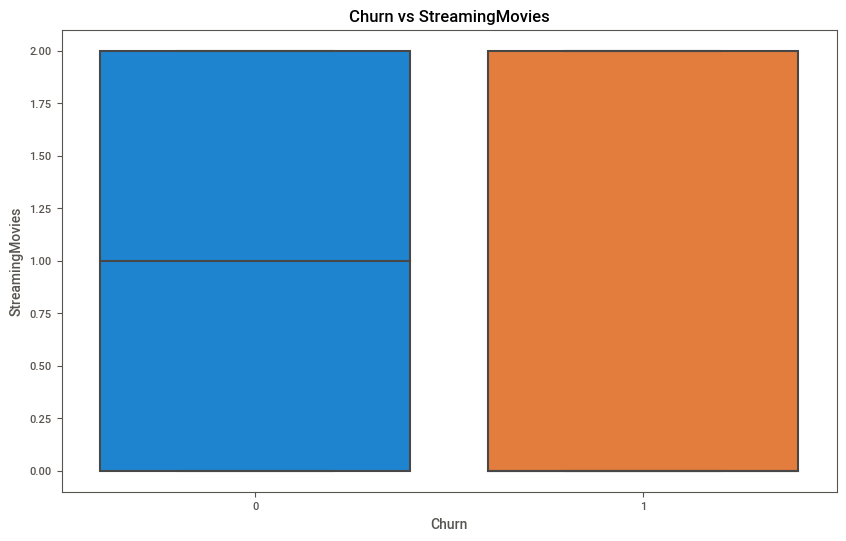

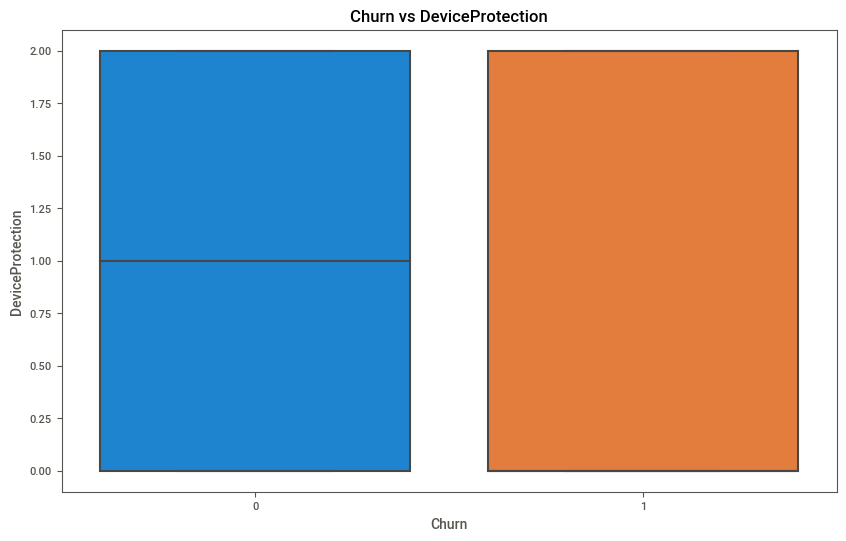

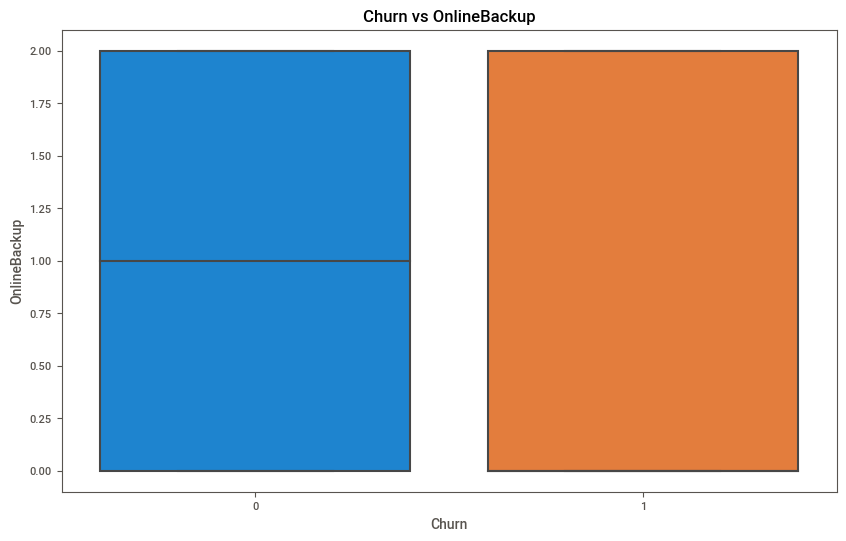

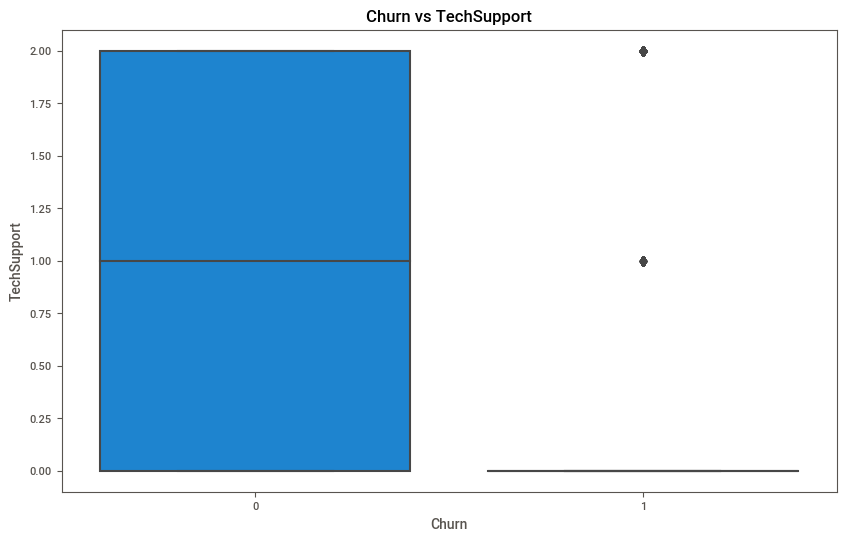

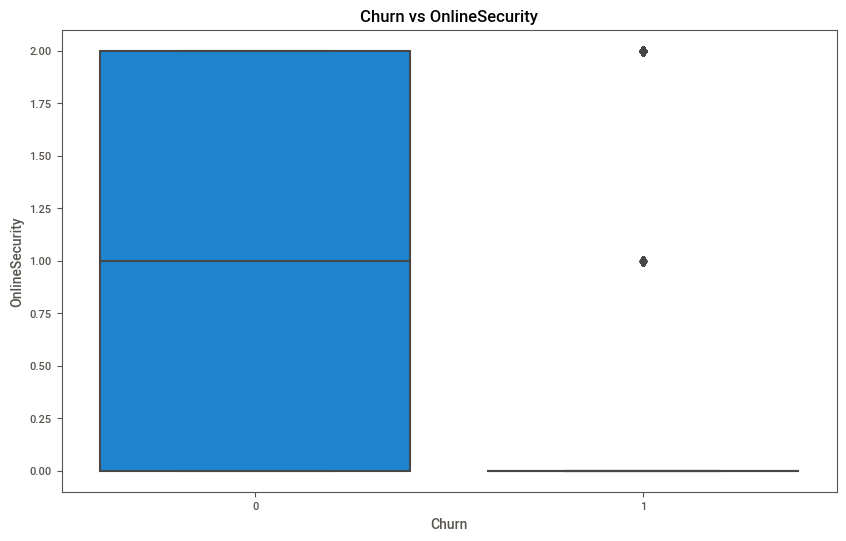

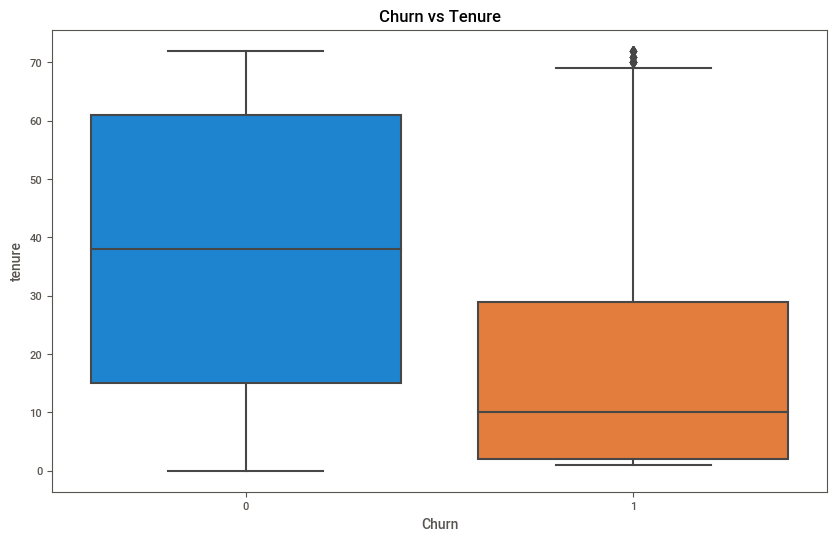

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Churn vs MonthlyCharges')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='PaperlessBilling', data=df)
plt.title('Churn vs PaperlessBilling')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Partner', data=df)
plt.title('Churn vs Partner')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Dependents', data=df)
plt.title('Churn vs Dependents')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='StreamingTV', data=df)
plt.title('Churn vs StreamingTV')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='StreamingMovies', data=df)
plt.title('Churn vs StreamingMovies')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='DeviceProtection', data=df)
plt.title('Churn vs DeviceProtection')
plt.show()




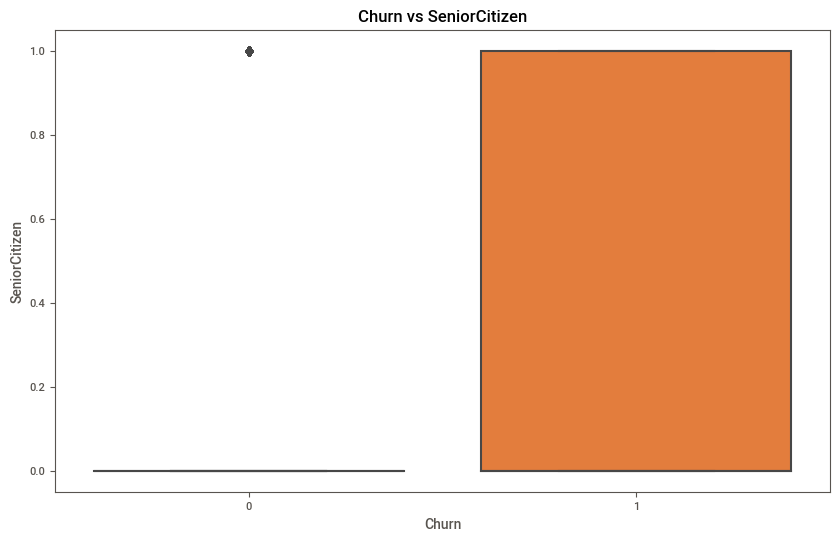

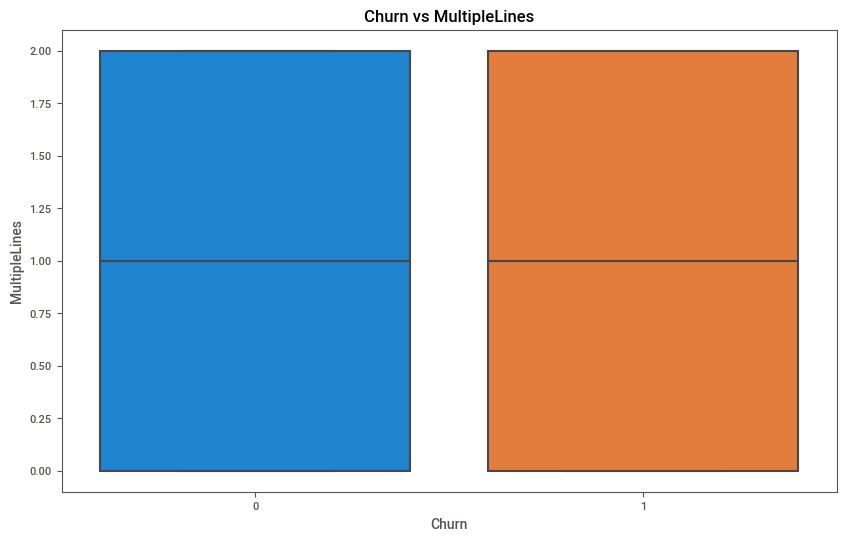

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MultipleLines', data=df)
plt.title('Churn vs MultipleLines')
plt.show()

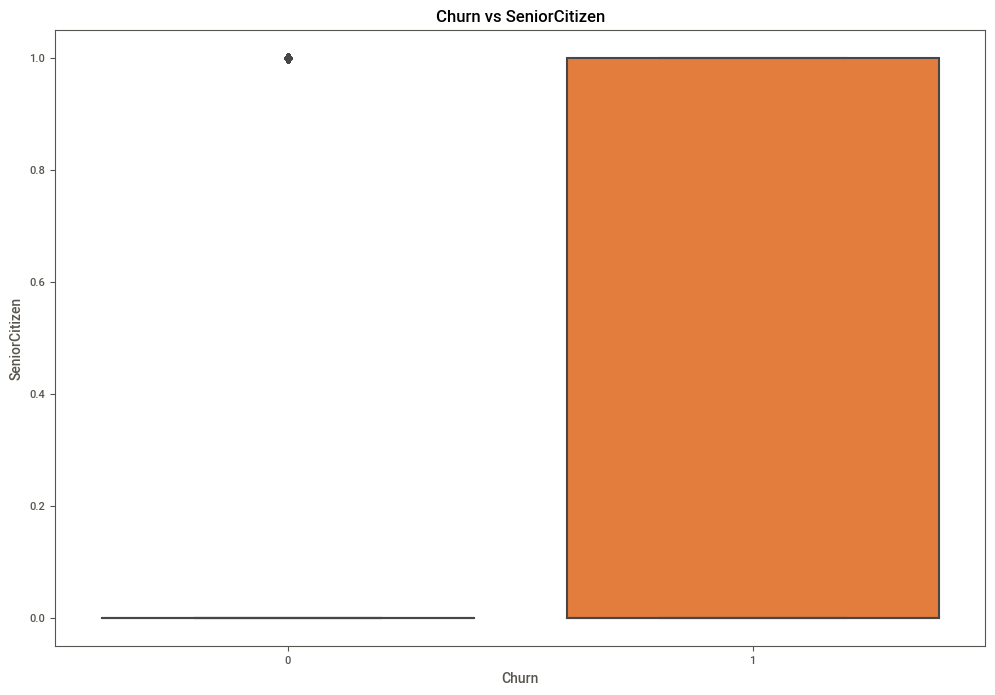

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Churn', y='SeniorCitizen', data=df)
plt.title('Churn vs SeniorCitizen')
plt.show()



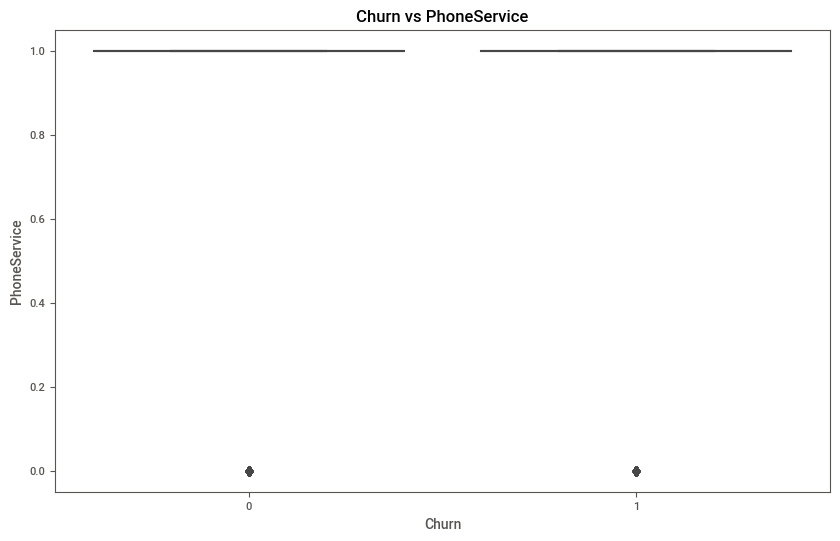

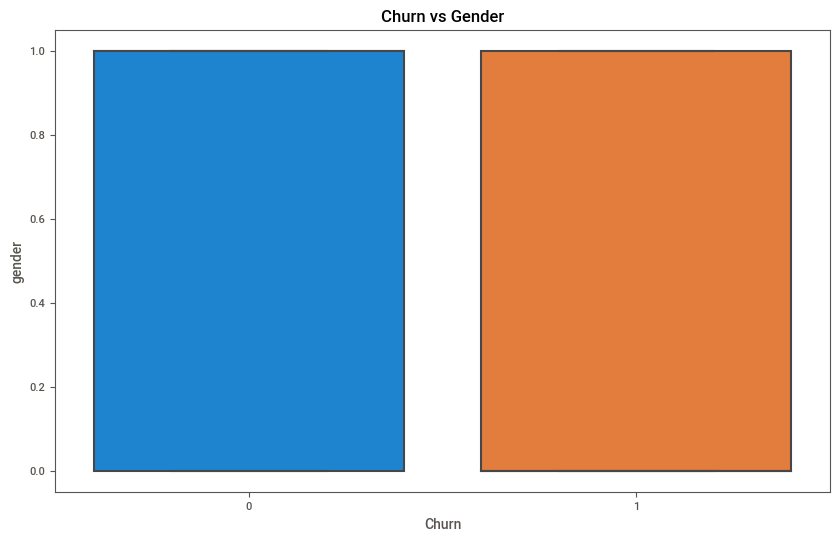

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='PhoneService', data=df)
plt.title('Churn vs PhoneService')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='gender', data=df)
plt.title('Churn vs Gender')
plt.show()

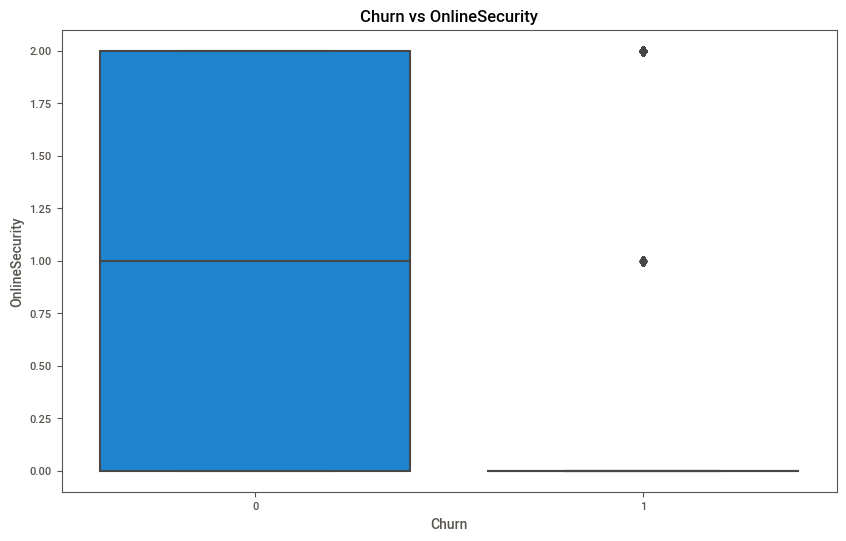

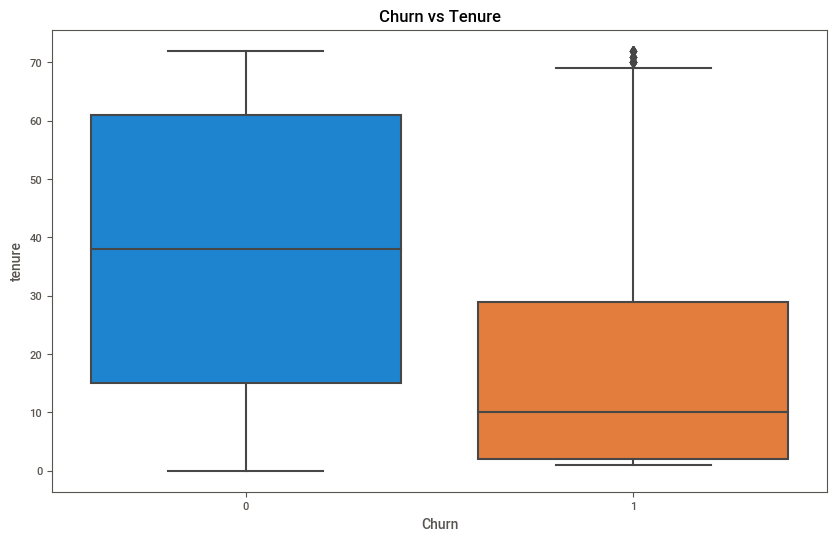

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='OnlineSecurity', data=df)
plt.title('Churn vs OnlineSecurity')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Churn vs Tenure')
plt.show()

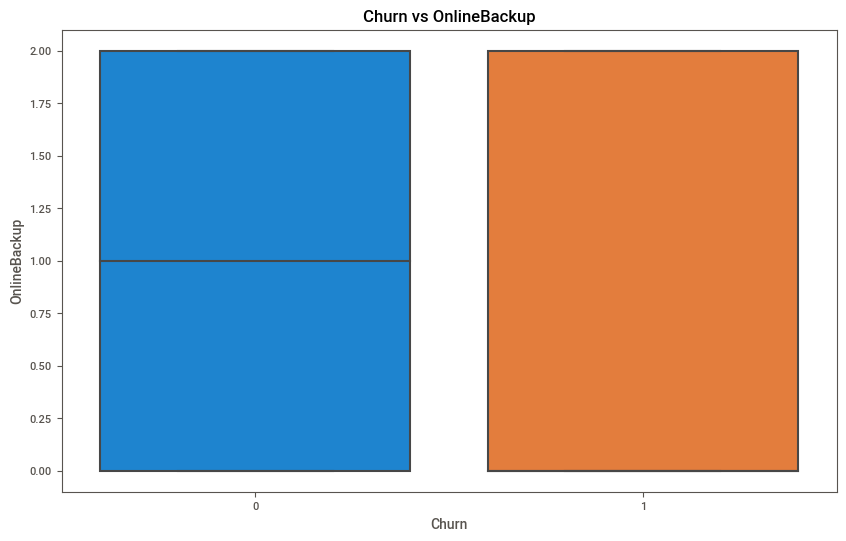

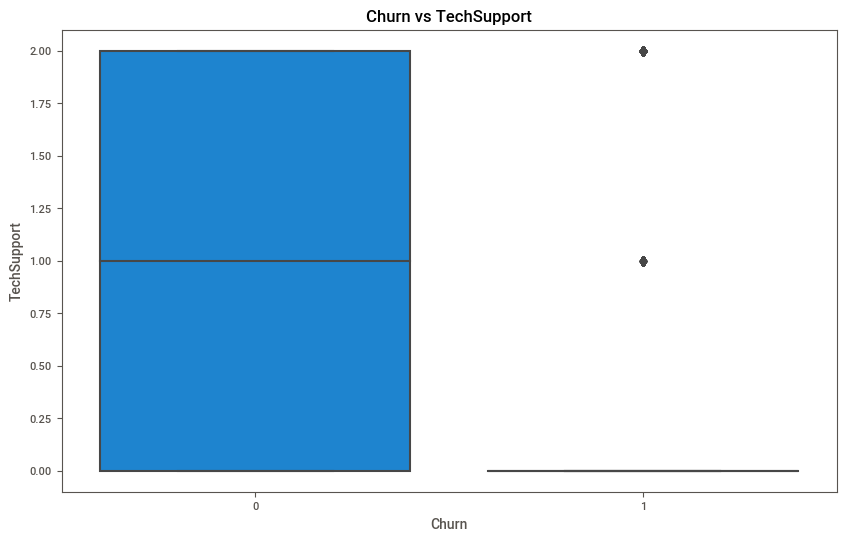

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='OnlineBackup', data=df)
plt.title('Churn vs OnlineBackup')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TechSupport', data=df)
plt.title('Churn vs TechSupport')
plt.show()